In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi,e
from sklearn.preprocessing import MinMaxScaler

dimensions = [ 2, 5, 10, 100 ]
N = 10000

def convert(list):
    return((*list,))

def get_distances(data, order=2):
	# assuming data is Nxd, N points in d dimensions
	dists = (np.sum(abs(data)**order,axis=1))**(1/order) 
	return dists

def triangular_kernel(distances,sigma=1.0): 
	kernel_vals = 1-(distances/sigma)
	return kernel_vals 

def Jp_metric(data, p):
	dists = (np.sum(abs(data/(1-data))**p,axis=1))**(1/p)
	return dists 

def Jpdash_metric(data, p):
	dists = (np.sum(abs(data/(1-abs(data)))**p,axis=1))**(1/p)
	return dists 
    
def sigmoid_function_as_kernel(distances,sigma=1.0):
	kernel_vals = (1/(1+ (np.exp(-distances/sigma))))
	return kernel_vals 

def get_distances(data, order=2):
	# assuming data is Nxd, N points in d dimensions
	dists = (np.sum(abs(data)**order,axis=1))**(1/order) 
	return dists

def p_triangular_kernel(distances,p,sigma=1.0): 
	kernel_vals = 1-((distances/sigma)**p)
	return kernel_vals 

def gaussian_kernel(distances,sigma=1.0):
	kernel_vals = np.exp(-((distances/sigma)**2))
	return kernel_vals 

def p_gaussian_kernel(distances,p,sigma=1.0):
	kernel_vals = np.exp(-((distances/sigma)**p))
	return kernel_vals 

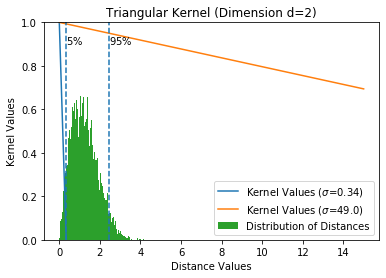

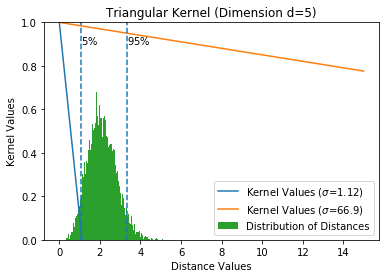

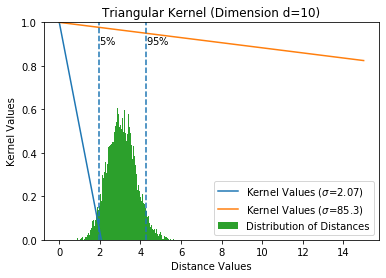

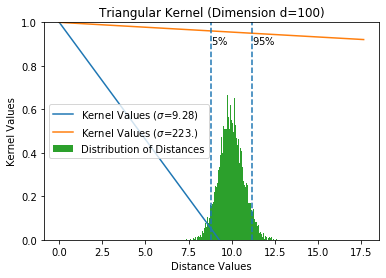

In [108]:
df1 = lambda x : get_distances(x,order=2) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.05)
	sigma2 = d_95/(1-0.95)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_title("Triangular Kernel (Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_dim'+str(dim)+'.png')

plt.show()

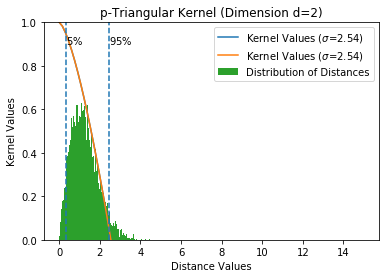

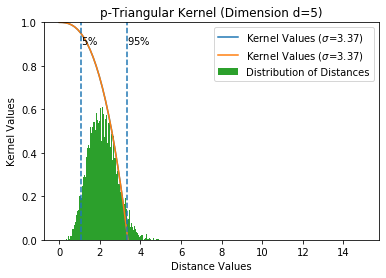

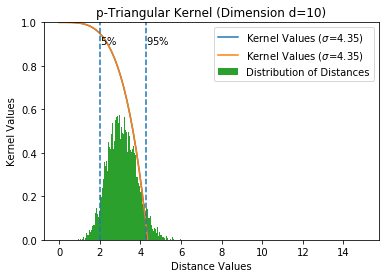

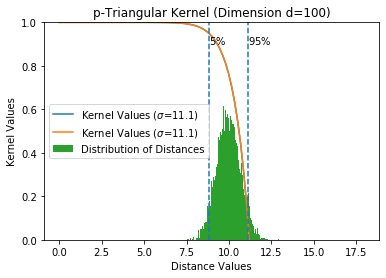

In [110]:
df1 = lambda x : get_distances(x,order=2) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=(np.log(0.95/0.05))/(np.log(d_95/d_5))
	sigma1 = d_5/((0.05)**(1/p))
	sigma2 = d_95/((0.95)**(1/p))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_triangular_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_triangular_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_title("p-Triangular Kernel (Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Triangular_Kernel_for_dim'+str(dim)+'.png')

plt.show()

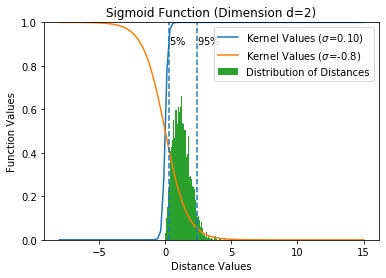

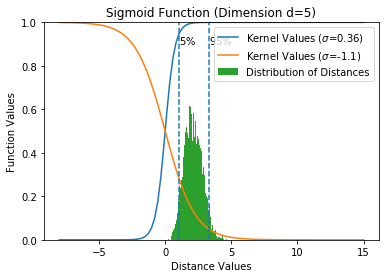

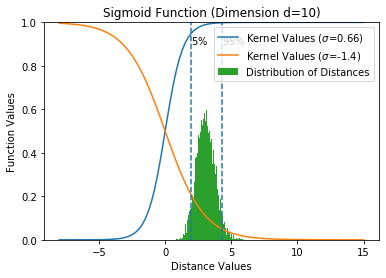

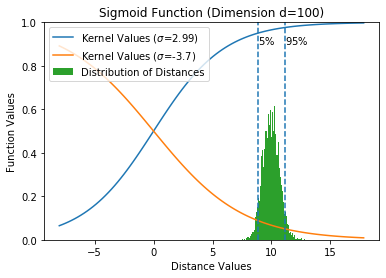

In [18]:
df1 = lambda x : get_distances(x,order=2) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = -d_5/(np.log(0.05/0.95))
	sigma2 = -d_95/(np.log(0.95/0.05))


	dist_vals = np.linspace( -8, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = sigmoid_function_as_kernel(dist_vals,sigma1) 
	kernel_vals2 = sigmoid_function_as_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_title("Sigmoid Function (Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Function Values')
	ax.legend() 
	fig.savefig('Sigmoid_Function_for_dim'+str(dim)+'.png')

plt.show()

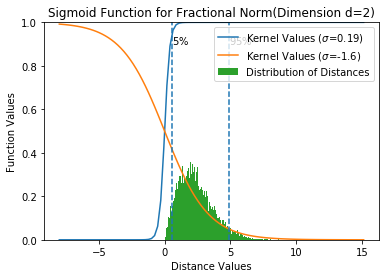

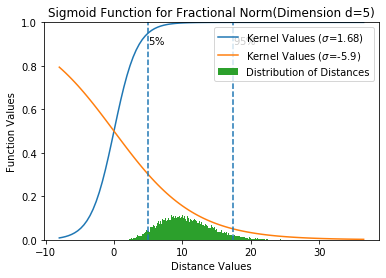

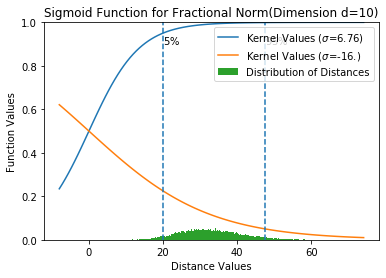

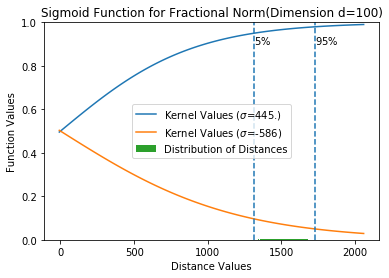

In [128]:
df1 = lambda x : get_distances(x,order=0.6) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = -d_5/(np.log(0.05/0.95))
	sigma2 = -d_95/(np.log(0.95/0.05))


	dist_vals = np.linspace( -8, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = sigmoid_function_as_kernel(dist_vals,sigma1) 
	kernel_vals2 = sigmoid_function_as_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_title("Sigmoid Function for Fractional Norm(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Function Values')
	ax.legend() 
	fig.savefig('Sigmoid_Function_for_fractional_norm_dim'+str(dim)+'.png')

plt.show()

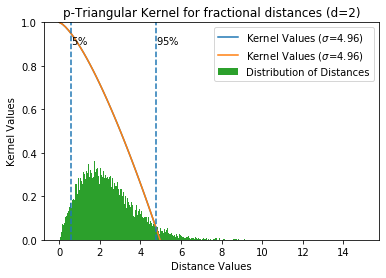

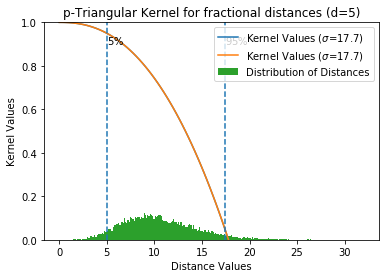

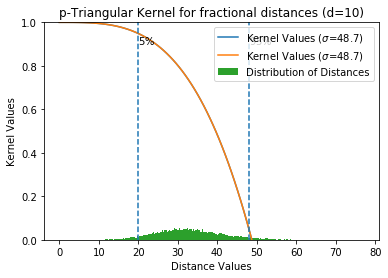

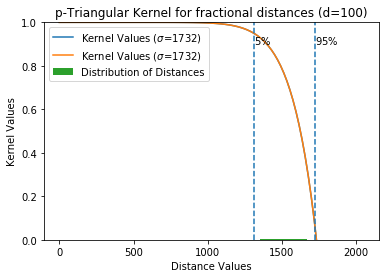

In [17]:
df1 = lambda x : get_distances(x,order=0.6) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=(np.log(0.95/0.05))/(np.log(d_95/d_5))
	sigma1 = d_5/((0.05)**(1/p))
	sigma2 = d_95/((0.95)**(1/p))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_triangular_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_triangular_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_title("p-Triangular Kernel for fractional distances (d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Triangular_Kernel_for_Fractional_norm_dim'+str(dim)+'.png')

plt.show()

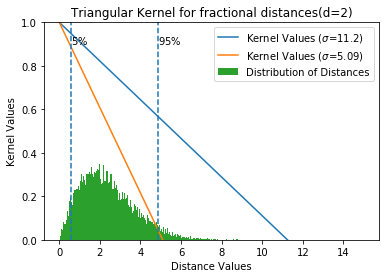

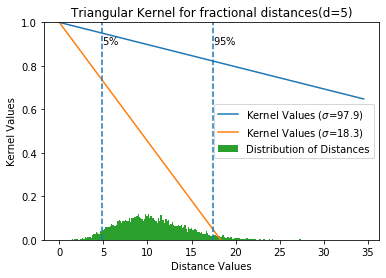

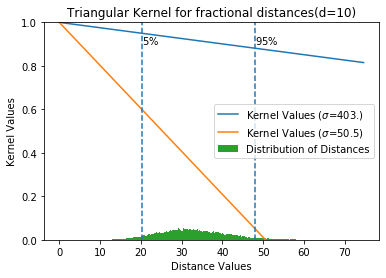

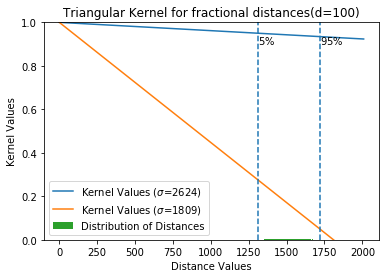

In [18]:
df1 = lambda x : get_distances(x,order=0.6) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_title("Triangular Kernel for fractional distances(d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Fractional_norm_dim'+str(dim)+'.png')

plt.show()

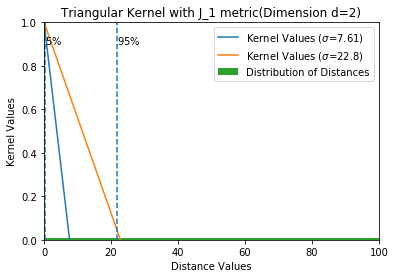

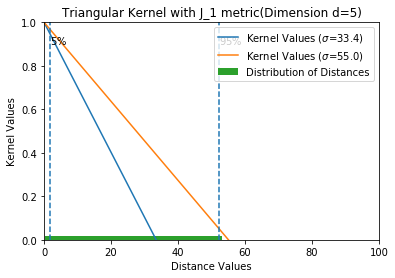

In [67]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,100.0)
	ax.set_title("Triangular Kernel with J_1 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jp_metric(p=1)_dim'+str(dim)+'.png')

plt.show()

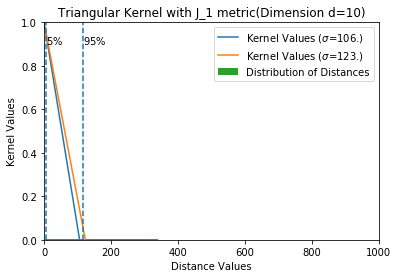

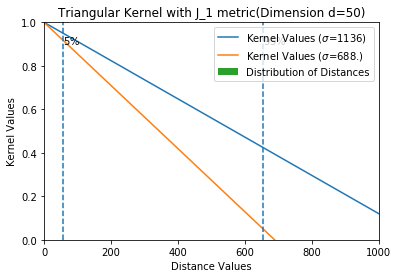

In [68]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,1000.0)
	ax.set_title("Triangular Kernel with J_1 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jp_metric(p=1)_dim'+str(dim)+'.png')

plt.show()

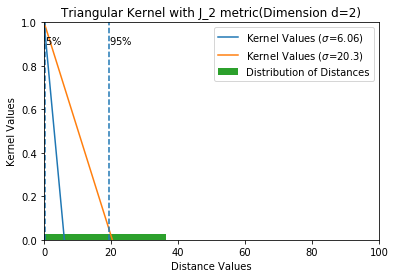

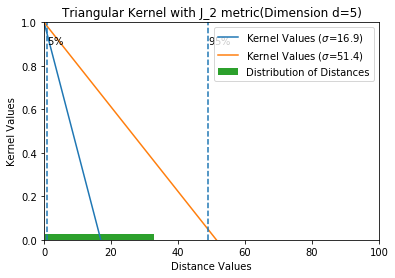

In [70]:
df1 = lambda x : Jp_metric(x,p=2) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,100.0)
	ax.set_title("Triangular Kernel with J_2 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jp_metric(p=2)_dim'+str(dim)+'.png')

plt.show()

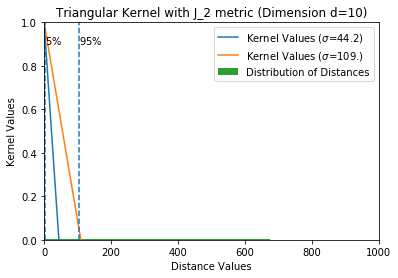

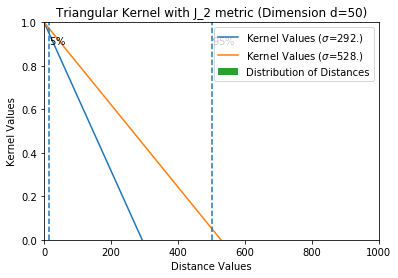

In [69]:
df1 = lambda x : Jp_metric(x,p=2) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,1000.0)
	ax.set_title("Triangular Kernel with J_2 metric (Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jp_metric(p=2)_dim'+str(dim)+'.png')

plt.show()

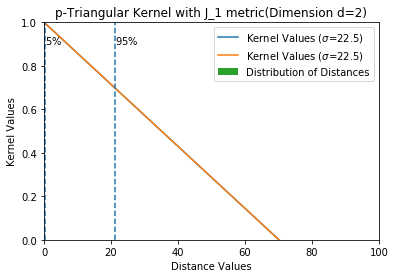

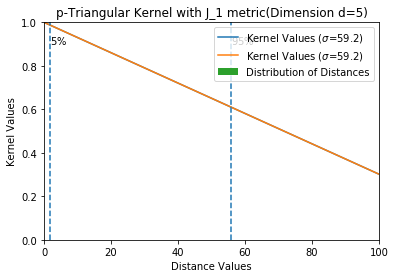

In [47]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=(np.log(0.95/0.05))/(np.log(d_95/d_5))
	sigma1 = d_5/((0.05)**(1/p))
	sigma2 = d_95/((0.95)**(1/p))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_triangular_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_triangular_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,100.0)
	ax.set_title("p-Triangular Kernel with J_1 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Triangular_Kernel_for_J_1_metric_dim'+str(dim)+'.png')

plt.show()

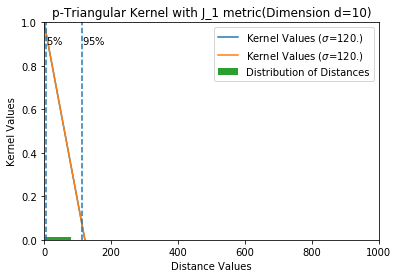

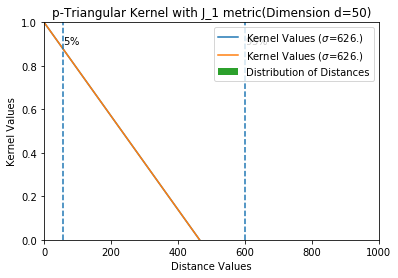

In [49]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=(np.log(0.95/0.05))/(np.log(d_95/d_5))
	sigma1 = d_5/((0.05)**(1/p))
	sigma2 = d_95/((0.95)**(1/p))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_triangular_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_triangular_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,1000.0)
	ax.set_title("p-Triangular Kernel with J_1 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Triangular_Kernel_for_J_1_metric_dim'+str(dim)+'.png')

plt.show()

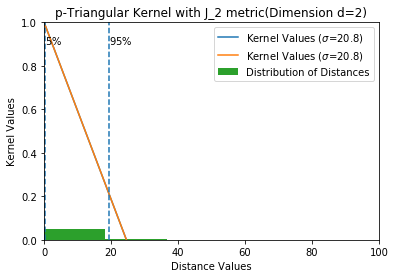

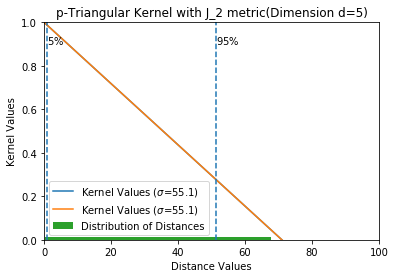

In [50]:
df1 = lambda x : Jp_metric(x,p=2) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=(np.log(0.95/0.05))/(np.log(d_95/d_5))
	sigma1 = d_5/((0.05)**(1/p))
	sigma2 = d_95/((0.95)**(1/p))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_triangular_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_triangular_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,100.0)
	ax.set_title("p-Triangular Kernel with J_2 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Triangular_Kernel_for_J_2_metric_dim'+str(dim)+'.png')

plt.show()

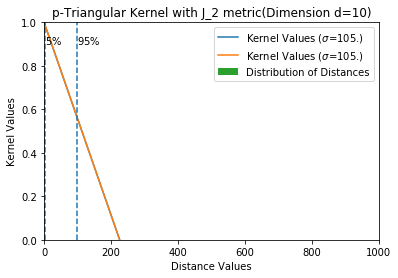

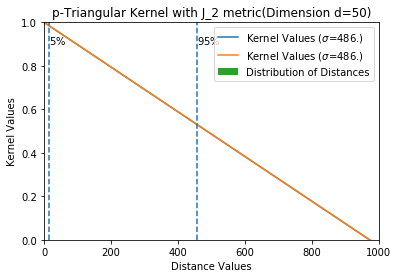

In [51]:
df1 = lambda x : Jp_metric(x,p=2) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=(np.log(0.95/0.05))/(np.log(d_95/d_5))
	sigma1 = d_5/((0.05)**(1/p))
	sigma2 = d_95/((0.95)**(1/p))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_triangular_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_triangular_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,1000.0)
	ax.set_title("p-Triangular Kernel with J_2 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Triangular_Kernel_for_J_2_metric_dim'+str(dim)+'.png')

plt.show()

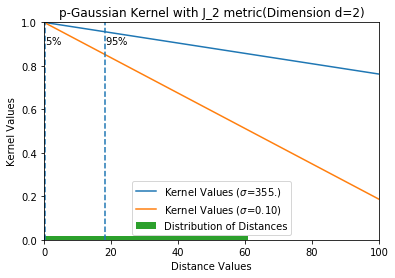

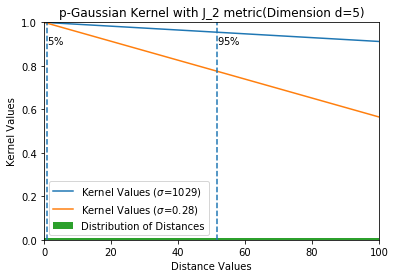

In [78]:
df1 = lambda x : Jp_metric(x,p=2) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=np.log(np.log(0.05)/np.log(0.95))/np.log(d_95/d_5)
	sigma1 = d_95/(-np.log(0.95))**(1/p)
	sigma2 = d_5/(-np.log(0.05))**(1/p)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_gaussian_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_gaussian_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0)
	ax.set_xlim(0.0,100.0)    
	ax.set_title("p-Gaussian Kernel with J_2 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Gaussian_Kernel_with_Jp(p=2)_metric_for_dim'+str(dim)+'.png')

plt.show()

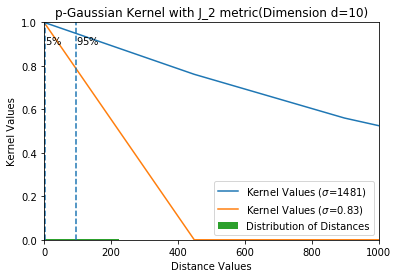

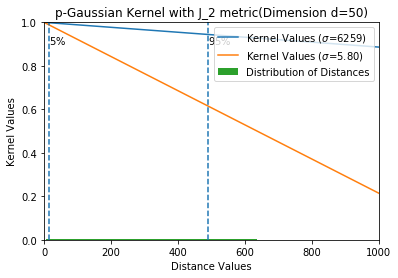

In [79]:
df1 = lambda x : Jp_metric(x,p=2) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=np.log(np.log(0.05)/np.log(0.95))/np.log(d_95/d_5)
	sigma1 = d_95/(-np.log(0.95))**(1/p)
	sigma2 = d_5/(-np.log(0.05))**(1/p)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_gaussian_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_gaussian_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0)
	ax.set_xlim(0.0,1000.0)    
	ax.set_title("p-Gaussian Kernel with J_2 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Gaussian_Kernel_with_Jp(p=2)_metric_for_dim'+str(dim)+'.png')

plt.show()

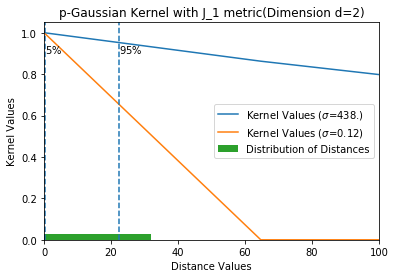

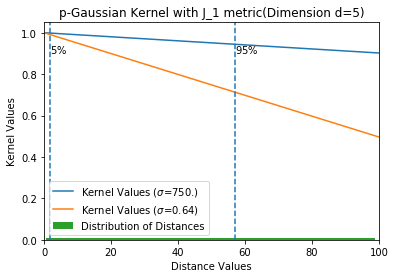

In [82]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=np.log(np.log(0.05)/np.log(0.95))/np.log(d_95/d_5)
	sigma1 = d_95/(-np.log(0.95))**(1/p)
	sigma2 = d_5/(-np.log(0.05))**(1/p)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_gaussian_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_gaussian_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
#	ax.set_ylim(0.0,1.0)
	ax.set_xlim(0.0,100.0)    
	ax.set_title("p-Gaussian Kernel with J_1 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Gaussian_Kernel_with_Jp(p=1)_metric_for_dim'+str(dim)+'.png')

plt.show()

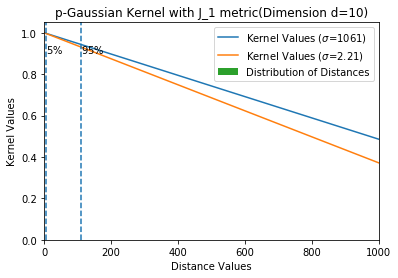

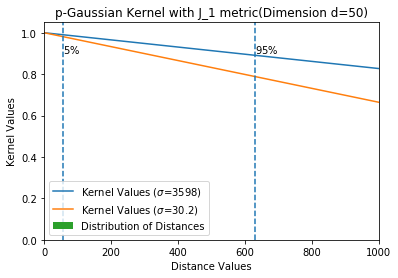

In [84]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	p=np.log(np.log(0.05)/np.log(0.95))/np.log(d_95/d_5)
	sigma1 = d_95/(-np.log(0.95))**(1/p)
	sigma2 = d_5/(-np.log(0.05))**(1/p)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_gaussian_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_gaussian_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
#	ax.set_ylim(0.0,1.0)
	ax.set_xlim(0.0,1000.0)    
	ax.set_title("p-Gaussian Kernel with J_1 metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('p-Gaussian_Kernel_with_Jp(p=1)_metric_for_dim'+str(dim)+'.png')

plt.show()

<ipython-input-73-2e2ba19697c1>:30: RuntimeWarning: overflow encountered in exp
  kernel_vals = (1/(1+ (np.exp(-distances/sigma))))


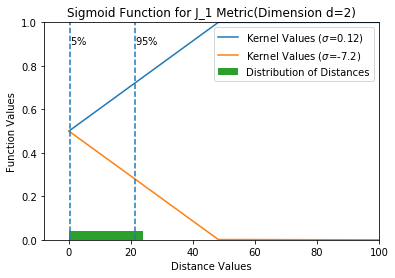

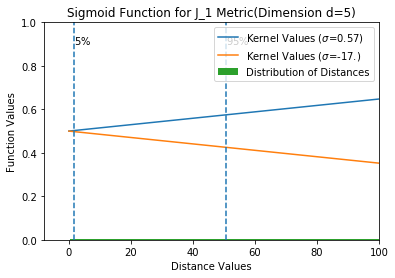

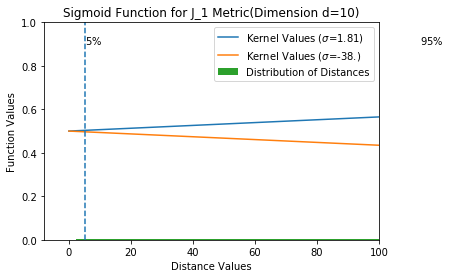

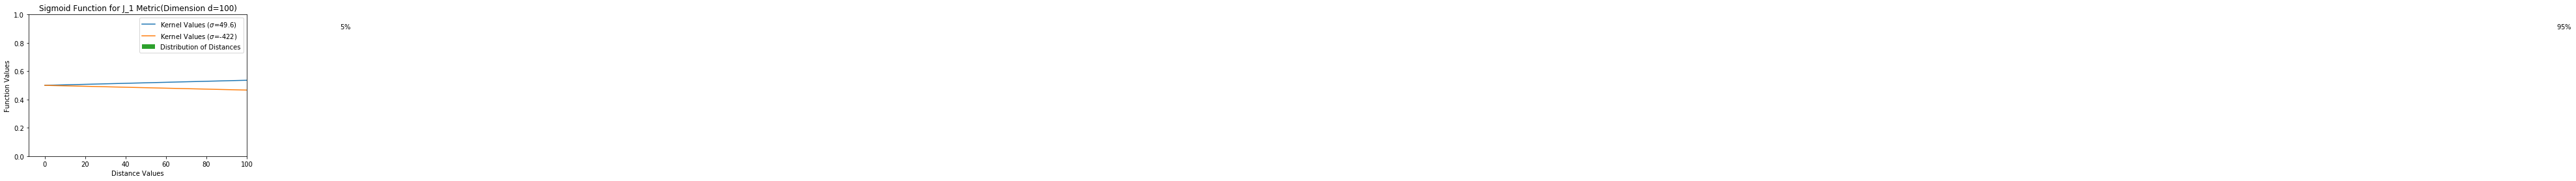

In [129]:
df1 = lambda x : Jp_metric(x,p=1) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = -d_5/(np.log(0.05/0.95))
	sigma2 = -d_95/(np.log(0.95/0.05))


	dist_vals = np.linspace(0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = sigmoid_function_as_kernel(dist_vals,sigma1) 
	kernel_vals2 = sigmoid_function_as_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(-8,100.0)
	ax.set_title("Sigmoid Function for J_1 Metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Function Values')
	ax.legend() 
	fig.savefig('Sigmoid_Function_for_Jp(p=1)_Metric_dim'+str(dim)+'.png')

plt.show()

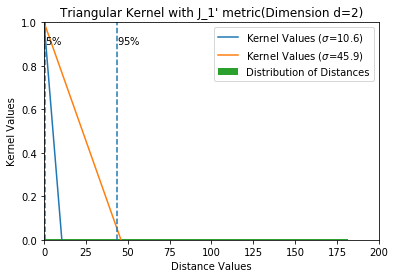

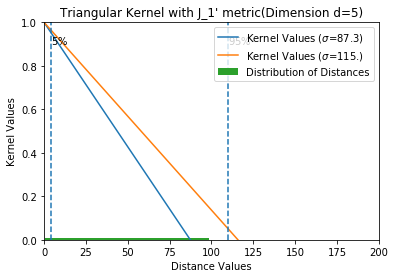

In [4]:
df1 = lambda x : Jpdash_metric(x,p=1) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,200.0)
	ax.set_title("Triangular Kernel with J_1' metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jpdash_metric(p=1)_dim'+str(dim)+'.png')

plt.show()

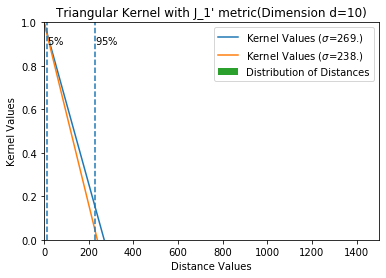

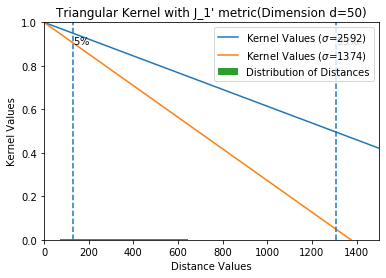

In [6]:
df1 = lambda x : Jpdash_metric(x,p=1) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,1500.0)
	ax.set_title("Triangular Kernel with J_1' metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jpdash_metric(p=1)_dim'+str(dim)+'.png')

plt.show()

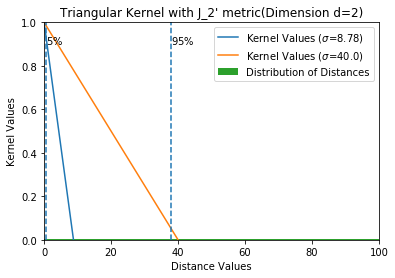

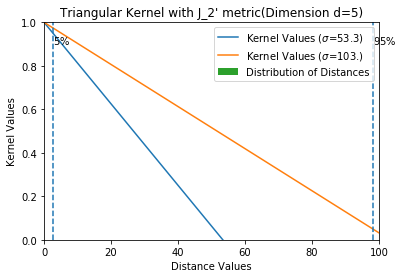

In [7]:
df1 = lambda x : Jpdash_metric(x,p=2) 


for dim in [2,5]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,100.0)
	ax.set_title("Triangular Kernel with J_2' metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jpdash_metric(p=2)_dim'+str(dim)+'.png')

plt.show()

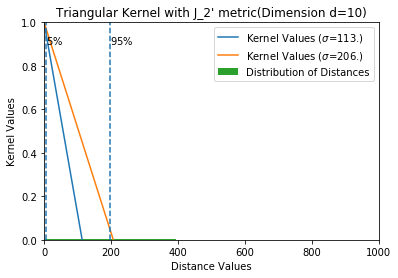

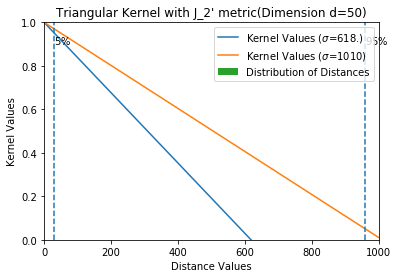

In [8]:
df1 = lambda x : Jpdash_metric(x,p=2) 


for dim in [10,50]:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = d_5/(1-0.95)
	sigma2 = d_95/(1-0.05)


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = triangular_kernel(dist_vals,sigma1) 
	kernel_vals2 = triangular_kernel(dist_vals,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,1000.0)
	ax.set_title("Triangular Kernel with J_2' metric(Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Triangular_Kernel_for_Jpdash_metric(p=2)_dim'+str(dim)+'.png')

plt.show()

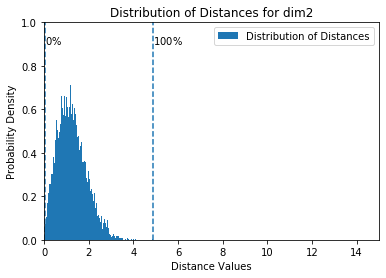

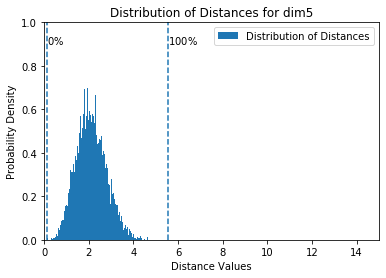

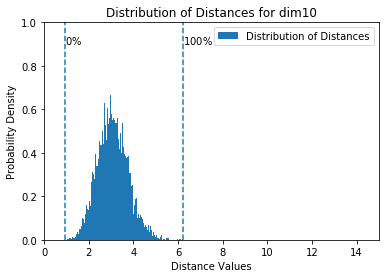

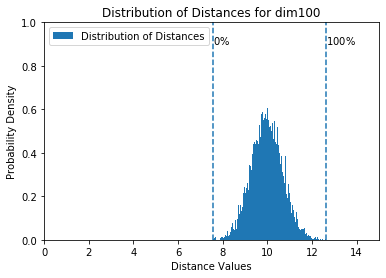

In [16]:
df1 = lambda x : get_distances(x,order=2) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_0, d_100 = np.percentile(actual_distances,0),np.percentile(actual_distances,100)



 


	fig,ax=plt.subplots()

	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_0,ls='--')
	ax.text(d_0,0.9,'$0 \\%$')
	ax.axvline(d_100,ls='--',)
	ax.text(d_100,0.9,'$100 \\%$')
	ax.set_ylim(0.0,1.0) 
	ax.set_xlim(0.0,15.0)
	ax.set_title("Distribution of Distances for dimension "+str(dim))
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Probability Density')
	ax.legend() 
	fig.savefig('Distribution of Distances for dim'+str(dim)+'.png')

plt.show()

In [ ]:
df1 = lambda x : get_distances(x,order=2) 


for dim in dimensions:
	sigma_data=1.0
	actual_data = np.random.multivariate_normal( mean=np.zeros(dim), cov=sigma_data**2 * np.eye(dim), size = N ) 
	actual_distances = df1(actual_data) 

	#estimating hyperparameter sigma using thumb rule in paper 
	d_5, d_95 = np.percentile(actual_distances,5),np.percentile(actual_distances,95)
	sigma1 = -d_5/(np.log(0.95))
	sigma2 = d_95/(-np.log(0.05))


	dist_vals = np.linspace( 0, np.max( (np.max(actual_distances)+5, 15) ) , 100)
	kernel_vals1 = p_gaussian_kernel(dist_vals,p,sigma1) 
	kernel_vals2 = p_gaussian_kernel(dist_vals,p,sigma2) 


	fig,ax=plt.subplots()
	ax.plot(dist_vals,kernel_vals1,label="Kernel Values ($\sigma$="+str(sigma1)[:4]+")") 
	ax.plot(dist_vals,kernel_vals2,label="Kernel Values ($\sigma$="+str(sigma2)[:4]+")") 
	ax.hist(actual_distances,bins=200,density=True,label="Distribution of Distances") 
	ax.axvline(d_5,ls='--')
	ax.text(d_5,0.9,'$5 \\%$')
	ax.axvline(d_95,ls='--',)
	ax.text(d_95,0.9,'$95 \\%$')
    
	ax.axhline(d_5,ls='--')
    
    
	ax.set_ylim(0.0,1.0)
	ax.set_xlim(0.0,100.0)    
	ax.set_title("Gaussian Kernel (Dimension d="+str(dim)+")")
	ax.set_xlabel('Distance Values')
	ax.set_ylabel('Kernel Values')
	ax.legend() 
	fig.savefig('Gaussian_Kernel__for_dim'+str(dim)+'.png')

plt.show()